In [1]:
%matplotlib inline
#!pip install gwopensci
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from gwopensci.datasets import event_gps
from gwpy.timeseries import TimeSeries

#-- Pick which event to look at
gps = event_gps('GW150914')
segment = (int(gps) - 30, int(gps) + 2)

# -- Download the data
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True)
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True, cache=True)

Fetched 1 URLs from https://losc.ligo.org for [1126259432 .. 1126259464)
Reading data... [Done]
Fetched 1 URLs from https://losc.ligo.org for [1126259432 .. 1126259464)
Reading data... [Done]


In [3]:
# -- Perform the Q-transform
hq = hdata.q_transform(frange=(30, 500))
lq = ldata.q_transform(frange=(30,500))

#-- Work with just a few hundred ms around teh event
small_hq = hq.crop(gps-0.1, gps+0.1)
small_lq = lq.crop(gps-0.1, gps+0.1)

#-- Print sum statistics
print(hq.shape)
print(small_hq.max())
print(small_lq.max())

#-- Get time indices, to figure out the time step between pixels
times = hq.xindex
delta_t = np.diff(times)
dt_avg = (delta_t.sum() / delta_t.size).value
#print(delta_t[0:50])
print(dt_avg)
print(small_hq.median())

(32000, 940)
120.367800238
66.3245434169
0.00100000000227
1.15320095531


(199, 940)


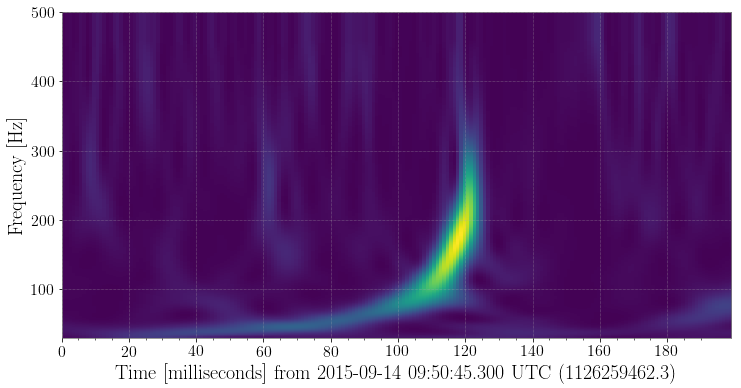

In [4]:
#-- Plot the L1 data, just for fun
plot2 = small_lq.plot()
print(small_lq.shape)

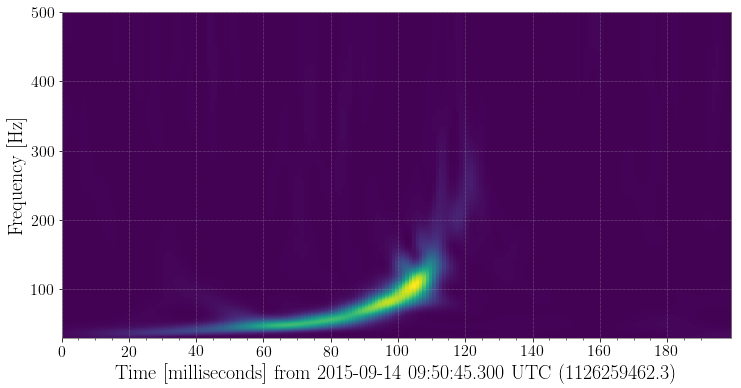

With shift -0.02 got max value 39.7953891565


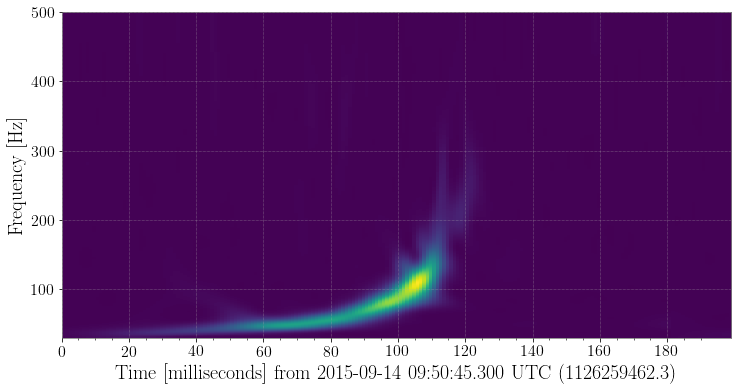

With shift -0.019 got max value 43.7386901863


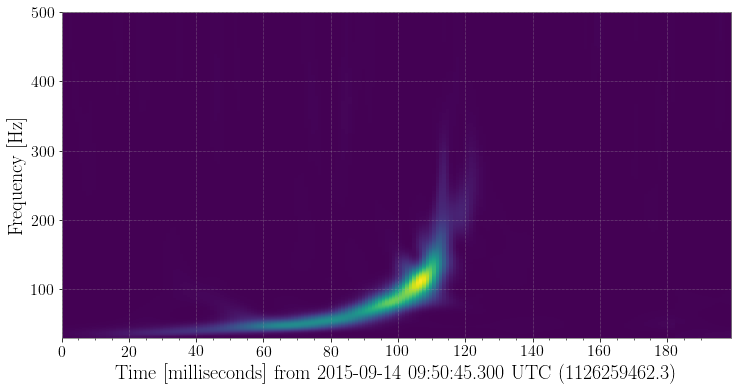

With shift -0.018 got max value 47.9195581763


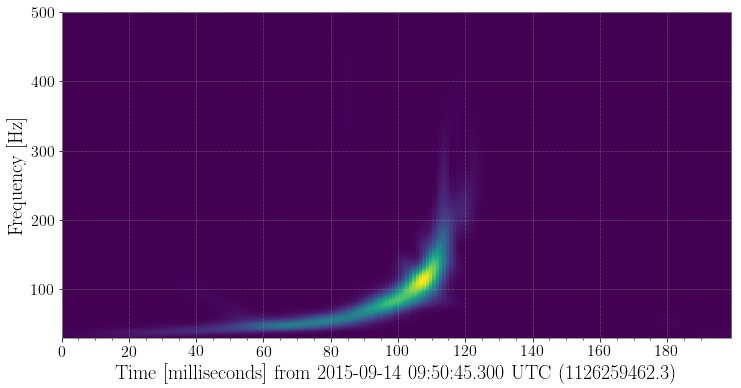

With shift -0.017 got max value 52.1794100156


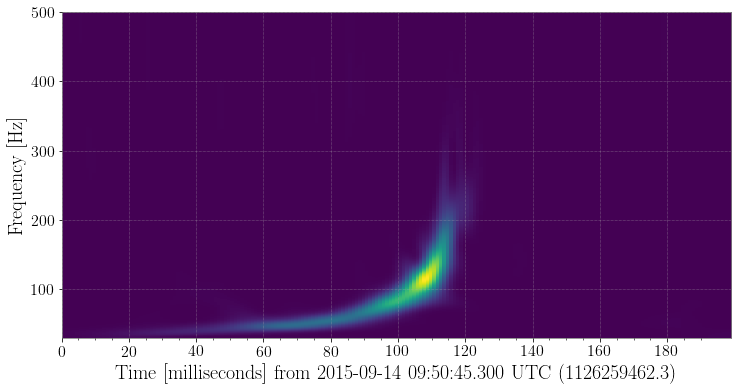

With shift -0.016 got max value 56.4409034895


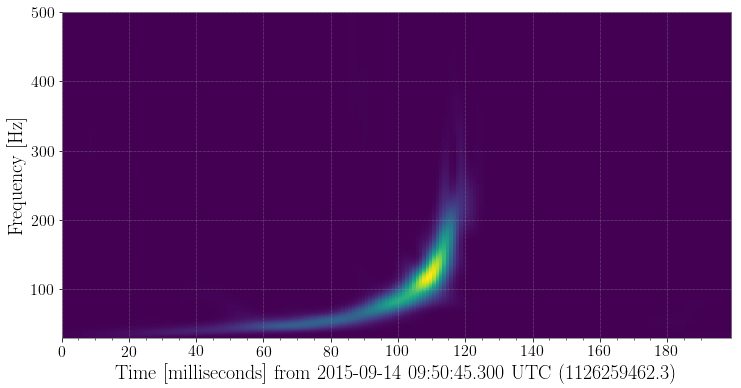

With shift -0.015 got max value 60.9315066939


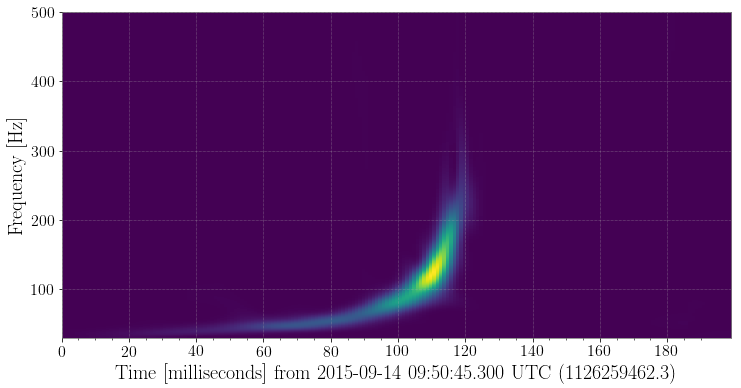

With shift -0.014 got max value 65.4672339772


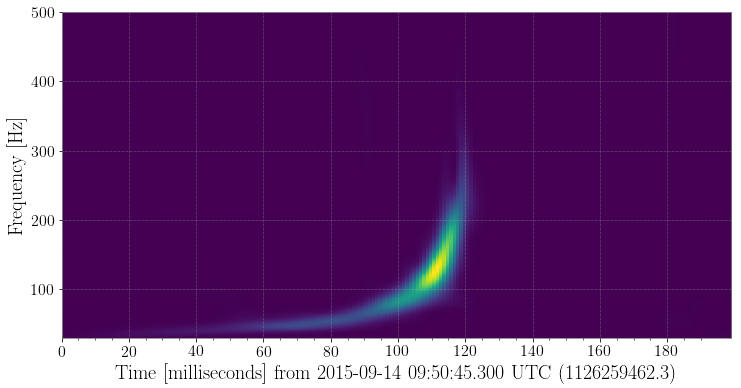

With shift -0.013 got max value 70.4730596614


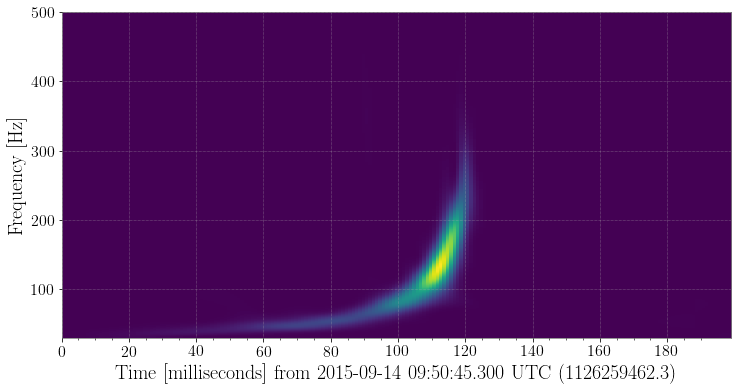

With shift -0.012 got max value 75.2089463719


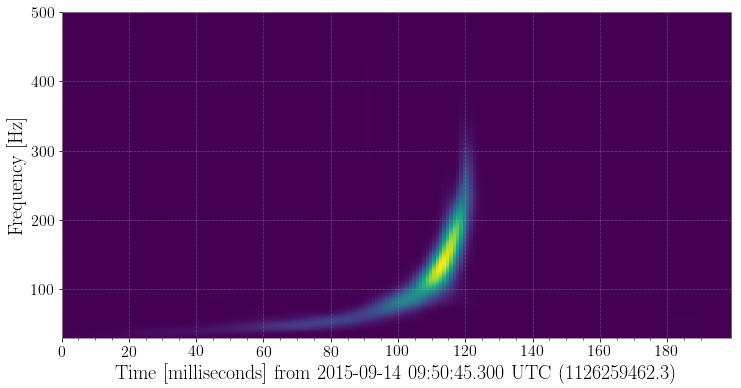

With shift -0.011 got max value 79.3572344147


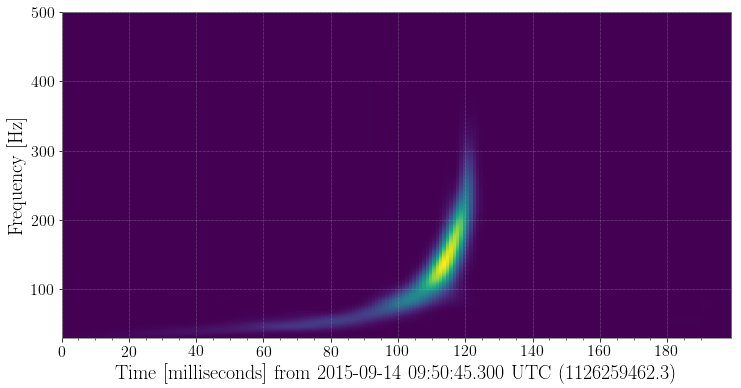

With shift -0.01 got max value 82.5571634903


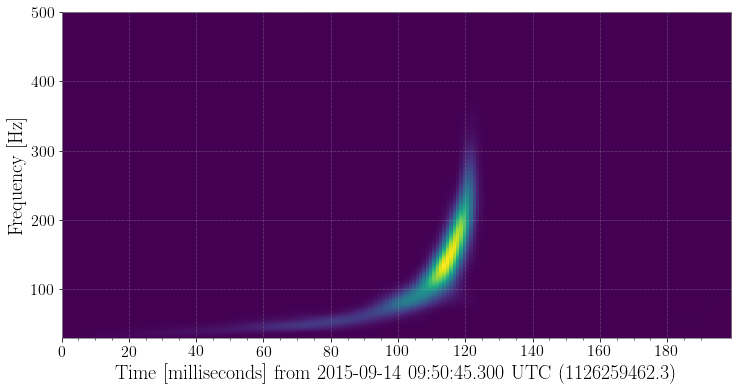

With shift -0.009 got max value 84.3844655549


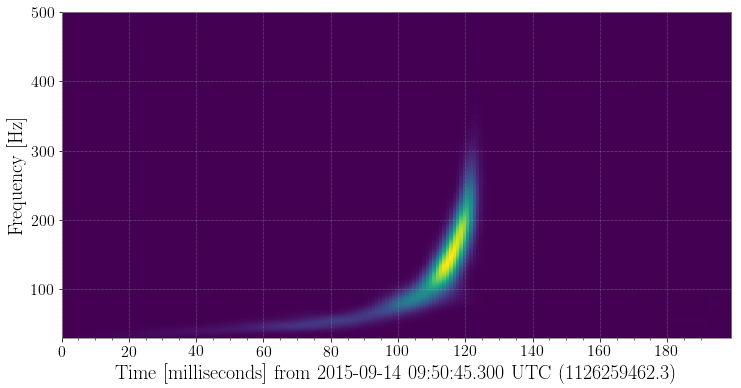

With shift -0.008 got max value 85.3712249096


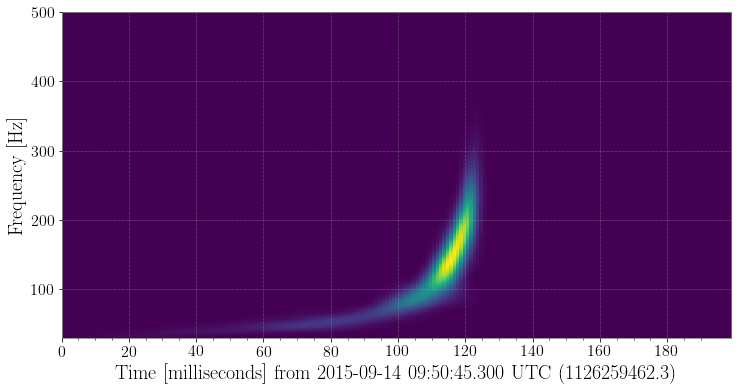

With shift -0.007 got max value 84.7428901205


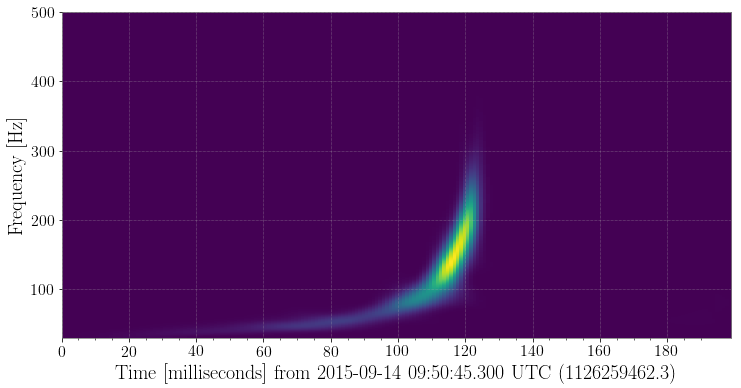

With shift -0.006 got max value 83.0293463541


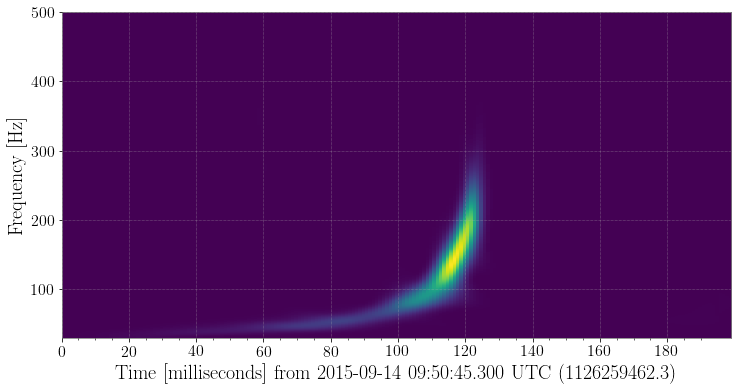

With shift -0.005 got max value 79.9574178935


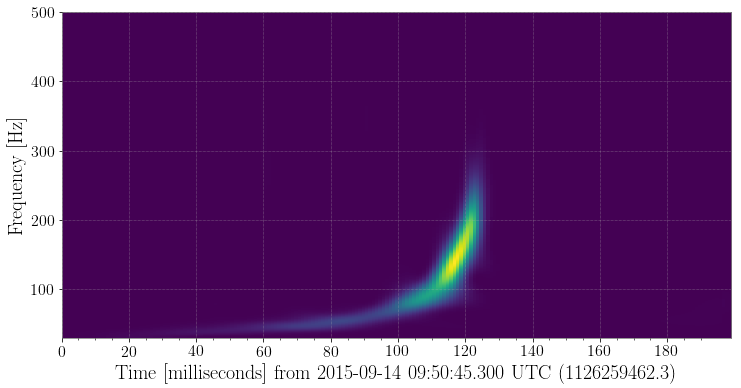

With shift -0.004 got max value 75.889020724


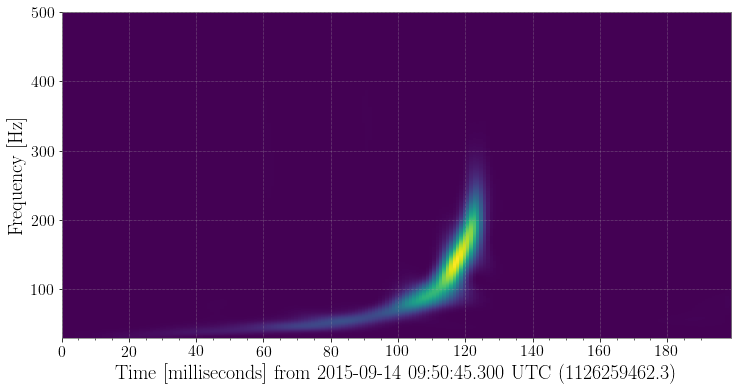

With shift -0.003 got max value 70.7321501855


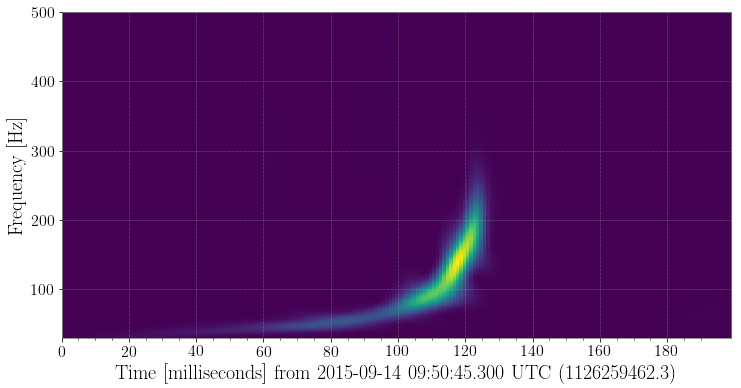

With shift -0.002 got max value 65.1068070928


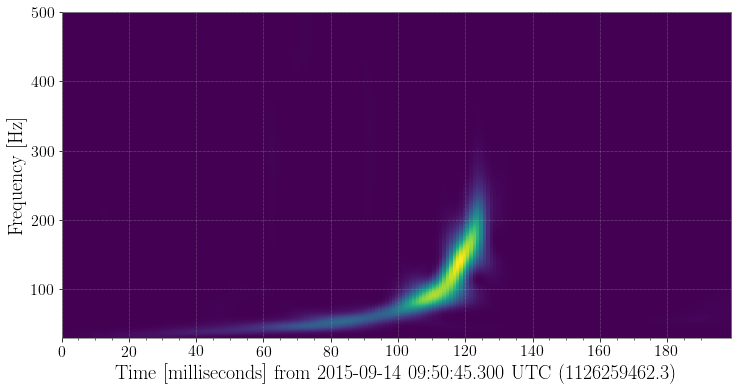

With shift -0.001 got max value 58.7772956664


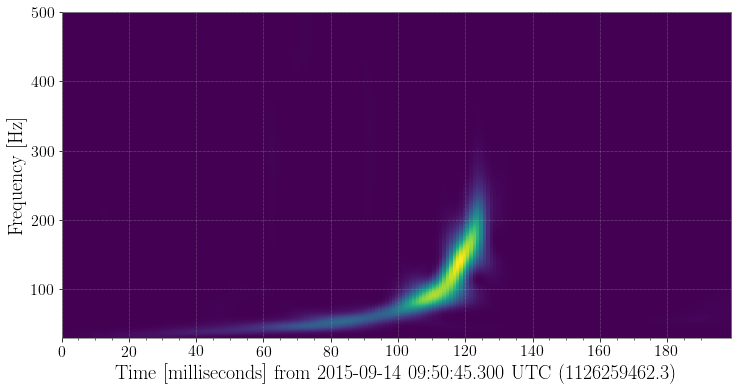

With shift 1.73472347598e-17 got max value 58.7772956664


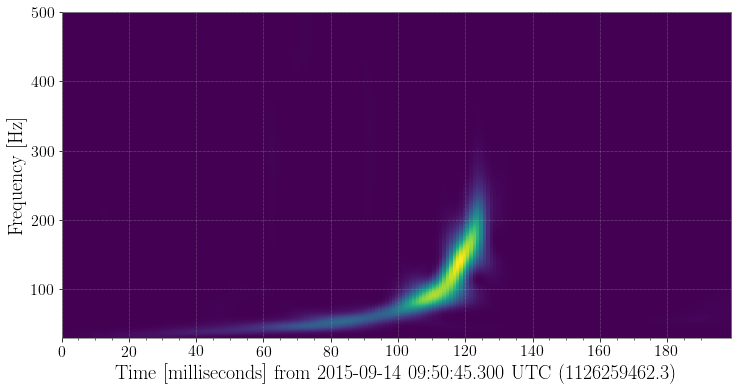

With shift 0.001 got max value 58.7772956664


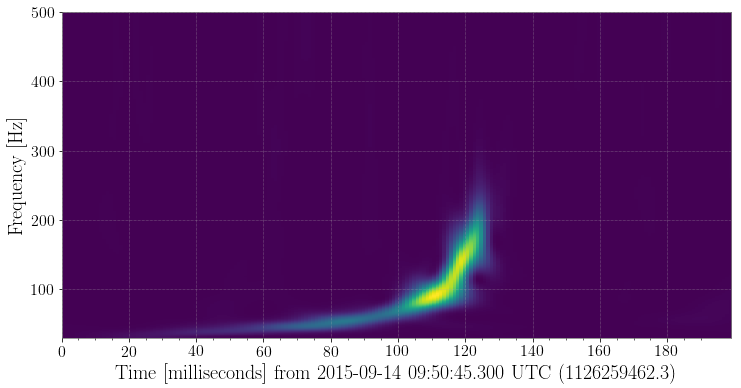

With shift 0.002 got max value 53.6480467605


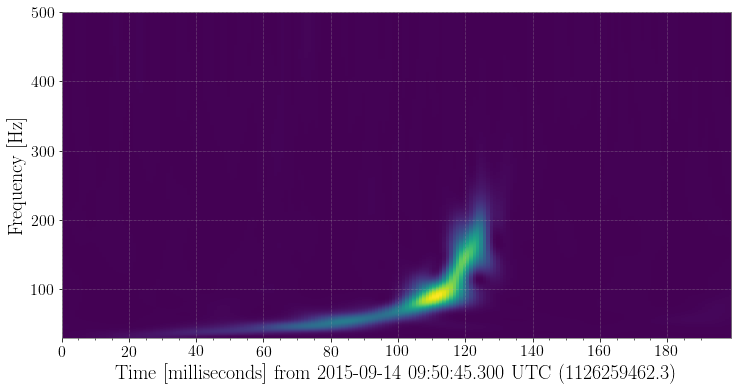

With shift 0.003 got max value 52.1079577608


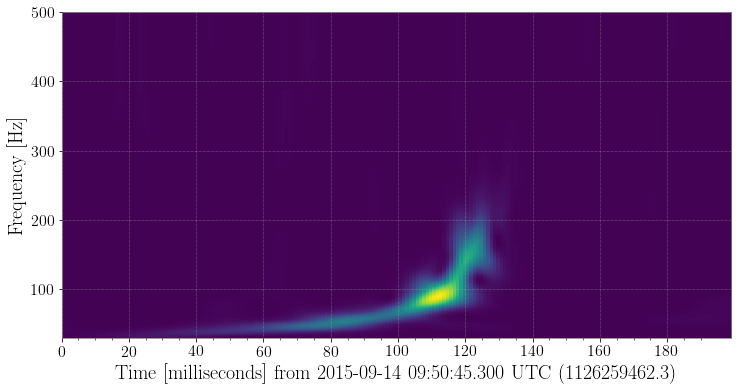

With shift 0.004 got max value 50.3946454336


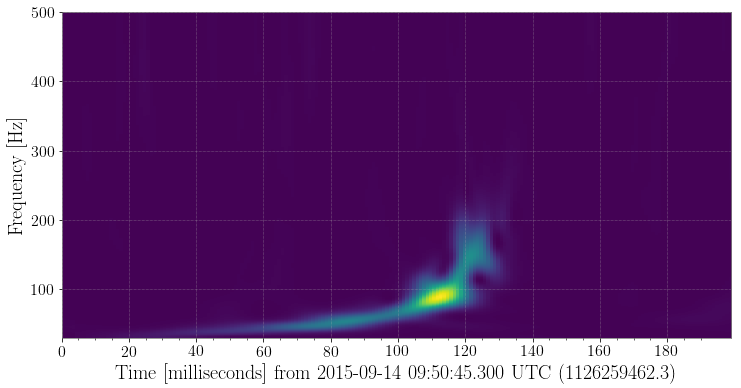

With shift 0.005 got max value 48.6232167043


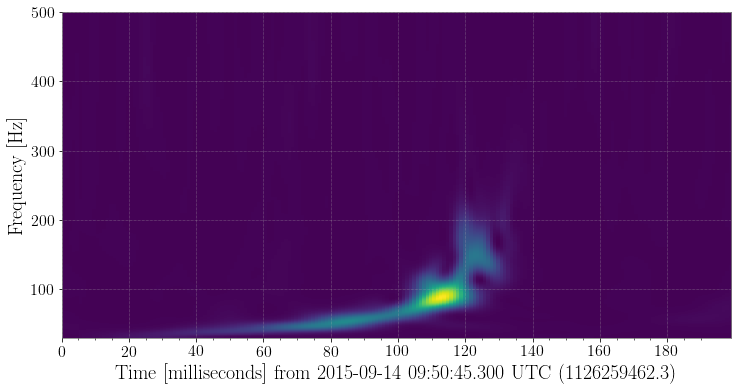

With shift 0.006 got max value 46.7881550893


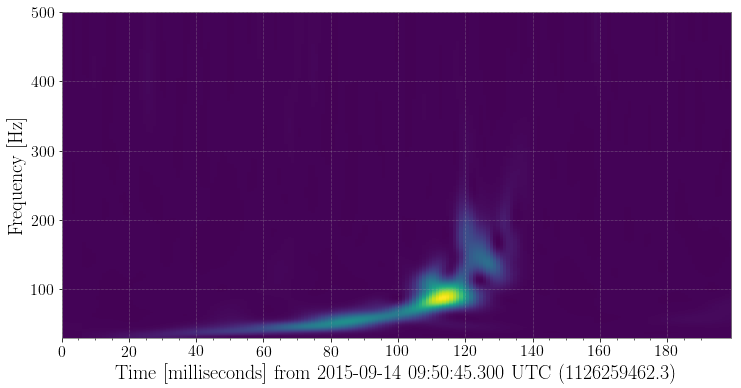

With shift 0.007 got max value 44.9030706863


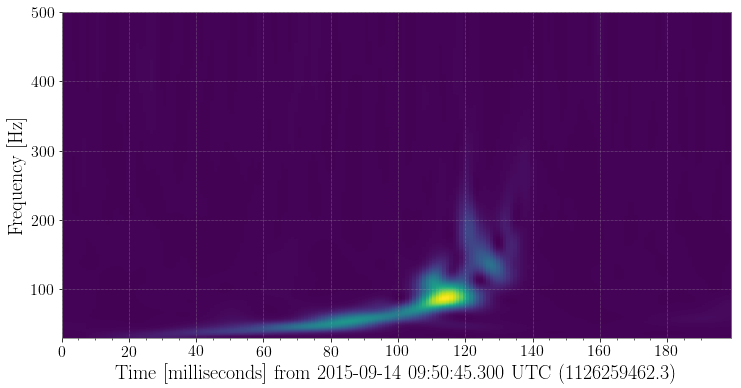

With shift 0.008 got max value 42.9799546558


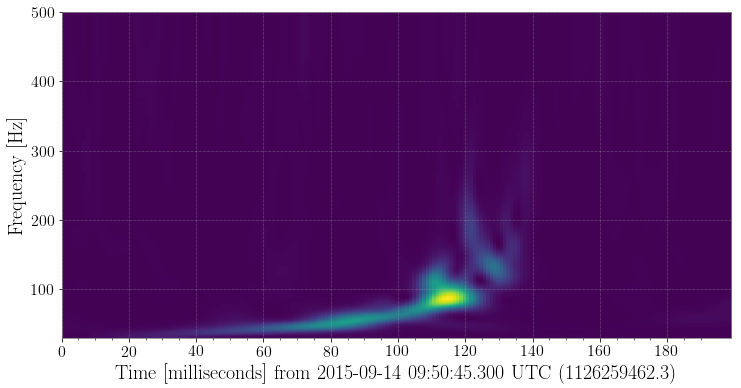

With shift 0.009 got max value 41.1147845033


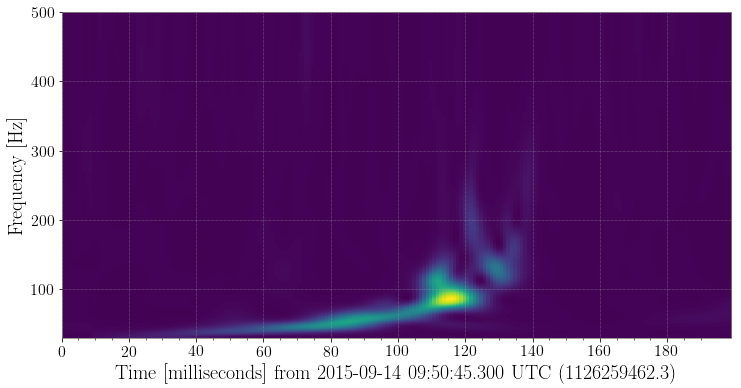

With shift 0.01 got max value 39.234629348


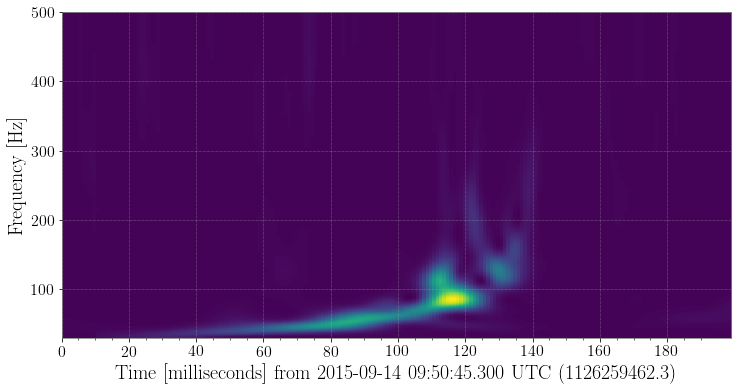

With shift 0.011 got max value 37.3706300216


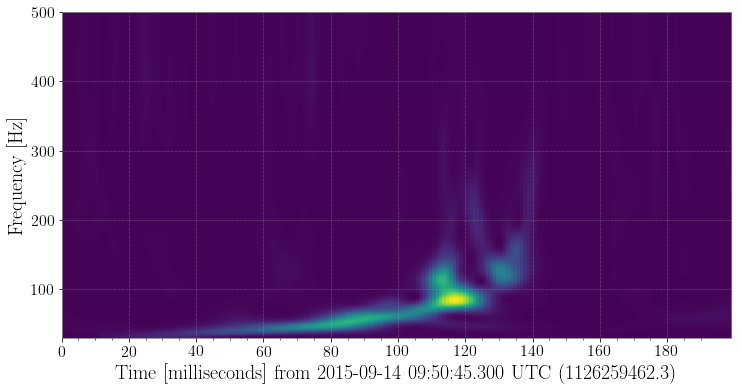

With shift 0.012 got max value 35.6515729252


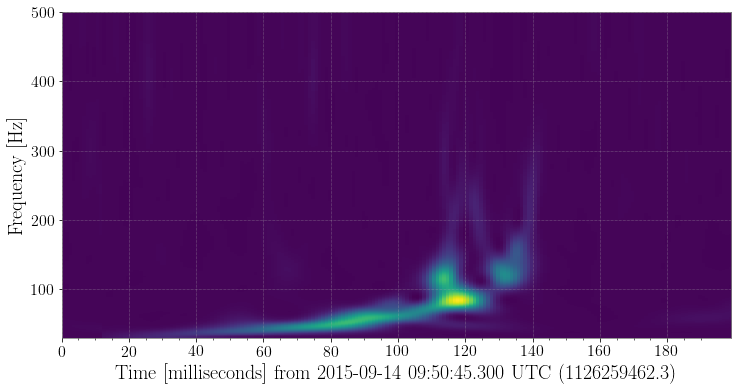

With shift 0.013 got max value 33.9689672743


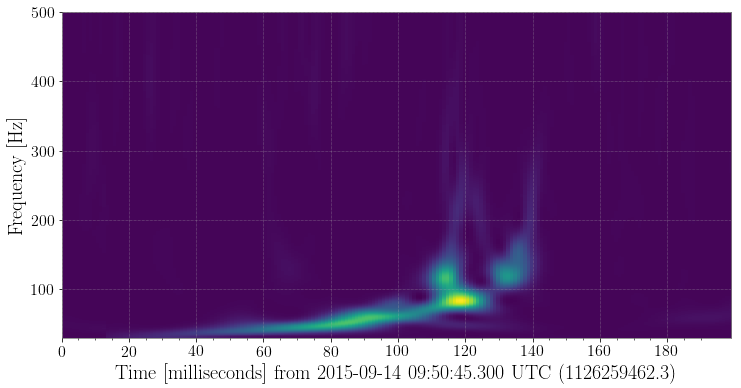

With shift 0.014 got max value 32.316071596


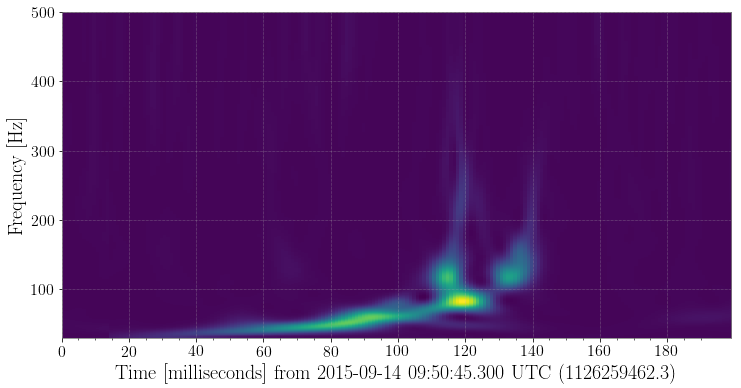

With shift 0.015 got max value 30.6739133106


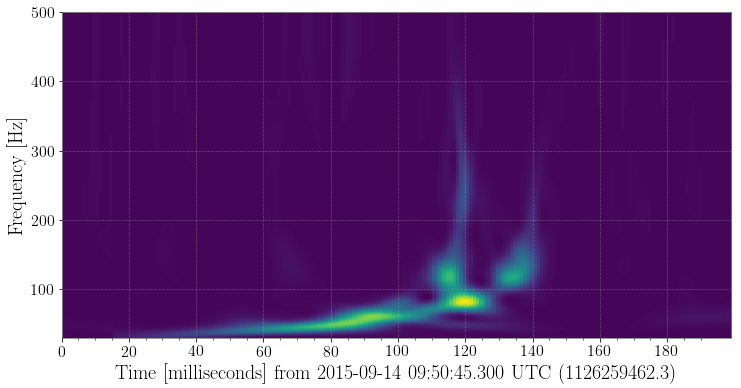

With shift 0.016 got max value 29.1519736514


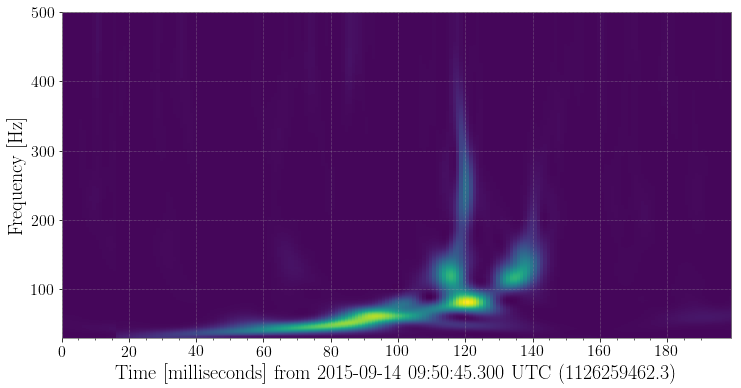

With shift 0.017 got max value 27.6374818015


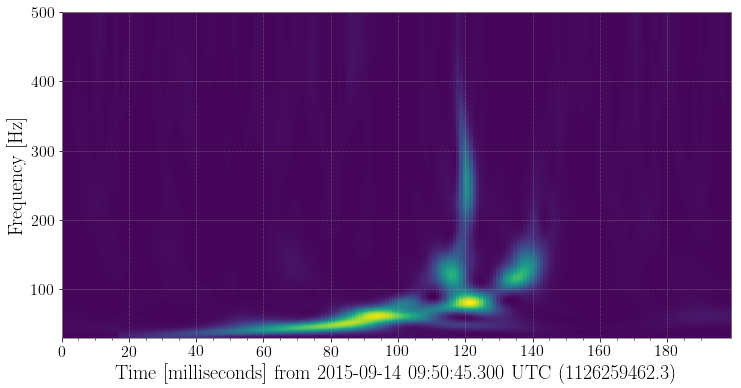

With shift 0.018 got max value 26.0994543203


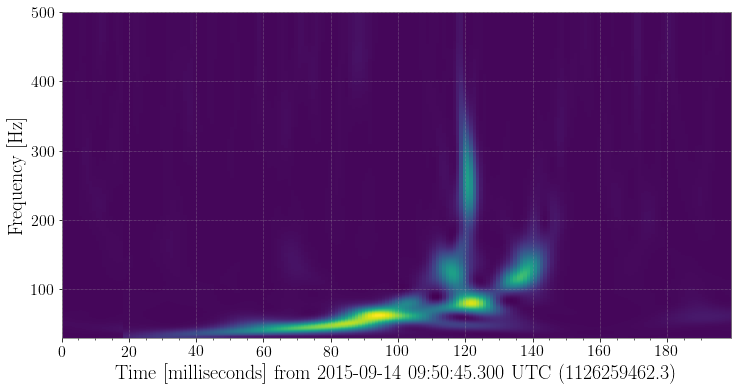

With shift 0.019 got max value 25.3481961368


Text(0,0.5,u'Peak pixel value')

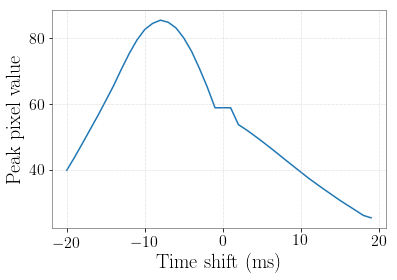

In [7]:
# -- Loop over time shifts, and multiply spectrograms for each shift
# -- Note, for observed detections, could use the time shift recovered by LVC
shiftlist = np.arange(-0.02, 0.02, 0.001)
peak_pixel = np.zeros(shiftlist.size)
for i, shift in enumerate(shiftlist):
    shift_i = int(shift / dt_avg)
    shifted_hq = np.roll(small_hq, shift_i, axis=0)
    product = shifted_hq*small_lq
    product.plot()
    plt.show()
    peak_pixel[i] = np.sqrt(product.max())

    print("With shift {0} got max value {1}".format(shift, peak_pixel[i]))

Text(0,0.5,u'Peak pixel value')

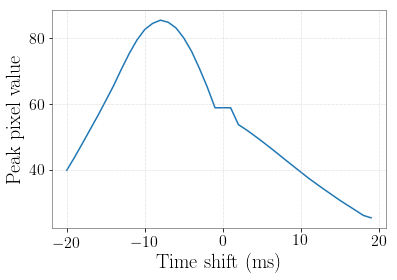

In [8]:
#-- Make a plot of the loudest pixel value vs. time shift
# -- to see which time shift gives the "best" results
plt.figure()
plt.plot(shiftlist*1000, peak_pixel)
plt.xlabel("Time shift (ms)")
plt.ylabel("Peak pixel value")

187060


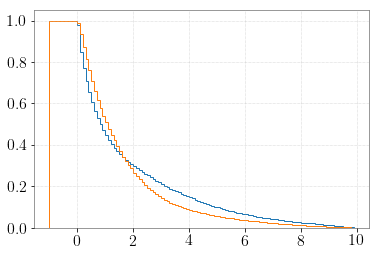

In [6]:
#-- Histogram the pixesl, just to get a sense of the noise distribution
print(product.size)
bins = np.arange(-1, 10, 0.1)

n, bins, p = plt.hist(product.value.flatten(), bins=bins, cumulative=-1, density=True, histtype='step')

#plt.figure()
n, bins, p = plt.hist(small_hq.flatten(), bins=bins, cumulative=-1, density=True, histtype='step')